<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/09-Bosques-Aleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Bosques Aleatorios
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino
            </font></p>            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Ignacio Zambrano &bull; 17-01-2026
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [1]:
# Paquetes necesarios
from sklearn.datasets import fetch_openml
import gdown
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor,  RandomForestClassifier


---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

Importo el Dataset

In [2]:
# Descarga del dataset
url = "https://drive.google.com/uc?id=1zBu79031KDxexYedgjMUyAi1ixEn-5sY"
output = "nanotox_dataset.csv"
gdown.download(url, output, quiet=False)

# Cargamos el dataset
df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1zBu79031KDxexYedgjMUyAi1ixEn-5sY
To: /content/nanotox_dataset.csv
100%|██████████| 44.1k/44.1k [00:00<00:00, 42.9MB/s]


Mostrar algunos datos

In [3]:
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic


Información general

In [4]:
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NPs         881 non-null    object 
 1   coresize    881 non-null    float64
 2   hydrosize   881 non-null    float64
 3   surfcharge  881 non-null    float64
 4   surfarea    881 non-null    float64
 5   Ec          881 non-null    float64
 6   Expotime    881 non-null    int64  
 7   dosage      881 non-null    float64
 8   e           881 non-null    float64
 9   NOxygen     881 non-null    int64  
 10  class       881 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 75.8+ KB
None


Descripción estadística

In [5]:
print("\nDescripción estadística:")
display(df.describe())


Descripción estadística:


,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,56.313280,513.781385,1.642111,42.074075,-4.018127,27.459705,39.651270,1.646050,1.308740
std,33.700297,346.601373,25.635780,47.111739,0.509806,19.534667,38.163289,0.089304,0.543581
min,7.500000,74.000000,-41.600000,7.000000,-5.170000,3.000000,0.000010,1.540000,1.000000
25%,32.000000,273.400000,-11.700000,15.000000,-4.160000,12.000000,10.000000,1.650000,1.000000
50%,45.300000,327.000000,-9.300000,24.100000,-3.890000,24.000000,25.000000,1.650000,1.000000
75%,86.000000,687.000000,29.400000,42.500000,-3.890000,24.000000,50.000000,1.650000,2.000000
max,125.000000,1843.000000,42.800000,210.000000,-1.510000,72.000000,300.000000,1.900000,3.000000


Preparación de variables

In [6]:
# Variables predictoras (solo numéricas)
X = df.select_dtypes(include=['float64', 'int64'])

# Variable objetivo (clasificación)
y = df['class']

print("\nVariables predictoras utilizadas:")
print(X.columns.tolist())


Variables predictoras utilizadas:
['coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen']



### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

Variables predictoras y objetivo

In [7]:
X = df.select_dtypes(include=['float64', 'int64'])
y = df['class']

División train / test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Entrenamiento del modelo

In [9]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predicciones

In [10]:
y_pred = rf.predict(X_test)

Métricas de evaluación

In [11]:
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.96

Reporte de clasificación:
              precision    recall  f1-score   support

       Toxic       0.94      0.99      0.96       143
    nonToxic       0.98      0.93      0.95       122

    accuracy                           0.96       265
   macro avg       0.96      0.96      0.96       265
weighted avg       0.96      0.96      0.96       265



Matriz de confusión

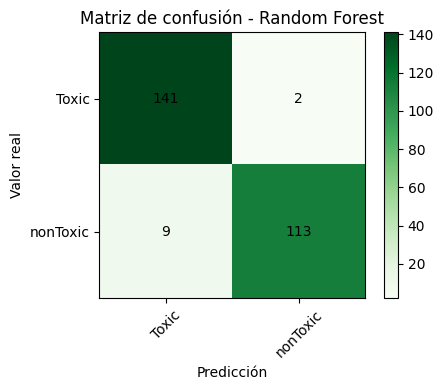

In [12]:
cm = confusion_matrix(y_test, y_pred)
labels = rf.classes_

plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap='Greens')
plt.title("Matriz de confusión - Random Forest")
plt.colorbar()

plt.xticks(range(len(labels)), labels, rotation=45)
plt.yticks(range(len(labels)), labels)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()